### Comparative Analysis of Supervised Classification Algorithms

### Objective
Evaluate and compare the performance of various supervised classifiers on a dataset from the UCI Machine Learning Repository, focusing on accuracy, precision, recall, and F1 score.

### Part 1: Dataset Selection

We'll use the **Iris dataset** for this analysis as it's a well-balanced, multi-class dataset. Adjust the dataset as needed if you prefer another.

1. **Dataset Overview**:
   - **Description**: A classic dataset to classify iris plants based on various features.
   - **Features**: 4 continuous features (sepal length, sepal width, petal length, petal width).
   - **Target Variable**: Species (setosa, versicolor, virginica).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Species')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Part 2: Supervised Classifiers Implementation

Implement the following classifiers: **Logistic Regression, Random Forest, SVM, Decision Tree, K-Nearest Neighbors (KNN), and Gradient Boosting**.

1. **Model Choices and Justification**:
   - **Logistic Regression**: Suitable for binary classification and interpretable.
   - **Random Forest**: A robust ensemble method that reduces overfitting.
   - **SVM**: Effective in high-dimensional spaces; works well for classification.
   - **Decision Tree**: Simple, interpretable, prone to overfitting but useful for comparison.
   - **KNN**: A non-parametric method useful for capturing local structure.
   - **Gradient Boosting**: Builds models sequentially, reducing bias.
   - **AdaBoost (Adaptive Boosting)**: An ensemble technique that combines multiple weak learners (often decision trees) to create a strong classifier. It adjusts the weights of misclassified instances, focusing on difficult cases.
   - **XGBoost (Extreme Gradient Boosting)**: An optimized gradient boosting algorithm that is highly efficient and effective, known for its speed and performance. It includes regularization to prevent overfitting, making it suitable for complex datasets.

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Initialize classifiers with a placeholder for hyperparameter tuning
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=42),  # Explicitly set algorithm
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "SVM": {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30]},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7, 9]},
    "Gradient Boosting": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    "AdaBoost": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    "XGBoost": {'n_estimators': [50, 100], 'max_depth': [3, 5]}
}

# Dictionary to store performance metrics for each classifier
performance_metrics = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train and evaluate each classifier with cross-validation and hyperparameter tuning
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)  # Train the model with cross-validation
    best_clf = grid_search.best_estimator_

    # Cross-validation for performance evaluation
    cv_scores = cross_val_score(best_clf, X, y, cv=5, scoring='f1_macro')
    
    y_pred = best_clf.predict(X_test)  # Predict on test set
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store results
    performance_metrics["Classifier"].append(name)
    performance_metrics["Accuracy"].append(accuracy)
    performance_metrics["Precision"].append(precision)
    performance_metrics["Recall"].append(recall)
    performance_metrics["F1 Score"].append(f1)
    
    print(f"{name}:\n"
          f"  Best Parameters: {grid_search.best_params_}\n"
          f"  CV F1 Score: {cv_scores.mean():.2f}\n"
          f"  Test Accuracy: {accuracy:.2f}\n"
          f"  Test Precision: {precision:.2f}\n"
          f"  Test Recall: {recall:.2f}\n"
          f"  Test F1 Score: {f1:.2f}\n")

# Convert results to DataFrame
performance_df = pd.DataFrame(performance_metrics)
performance_df

Logistic Regression:
  Best Parameters: {'C': 1}
  CV F1 Score: 0.97
  Test Accuracy: 1.00
  Test Precision: 1.00
  Test Recall: 1.00
  Test F1 Score: 1.00

Random Forest:
  Best Parameters: {'max_depth': None, 'n_estimators': 200}
  CV F1 Score: 0.97
  Test Accuracy: 1.00
  Test Precision: 1.00
  Test Recall: 1.00
  Test F1 Score: 1.00

SVM:
  Best Parameters: {'C': 1, 'gamma': 'scale'}
  CV F1 Score: 0.98
  Test Accuracy: 1.00
  Test Precision: 1.00
  Test Recall: 1.00
  Test F1 Score: 1.00

Decision Tree:
  Best Parameters: {'max_depth': None}
  CV F1 Score: 0.95
  Test Accuracy: 1.00
  Test Precision: 1.00
  Test Recall: 1.00
  Test F1 Score: 1.00

K-Nearest Neighbors:
  Best Parameters: {'n_neighbors': 3}
  CV F1 Score: 0.97
  Test Accuracy: 1.00
  Test Precision: 1.00
  Test Recall: 1.00
  Test F1 Score: 1.00

Gradient Boosting:
  Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
  CV F1 Score: 0.96
  Test Accuracy: 1.00
  Test Precision: 1.00
  Test Recall: 1.00
  Tes

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0
3,Decision Tree,1.0,1.0,1.0,1.0
4,K-Nearest Neighbors,1.0,1.0,1.0,1.0
5,Gradient Boosting,1.0,1.0,1.0,1.0
6,AdaBoost,1.0,1.0,1.0,1.0
7,XGBoost,1.0,1.0,1.0,1.0


### Part 3: Visualizing Classifier Performance

Generate a bar chart to compare classifiers on each metric and save it as `classifier_performance.png`.

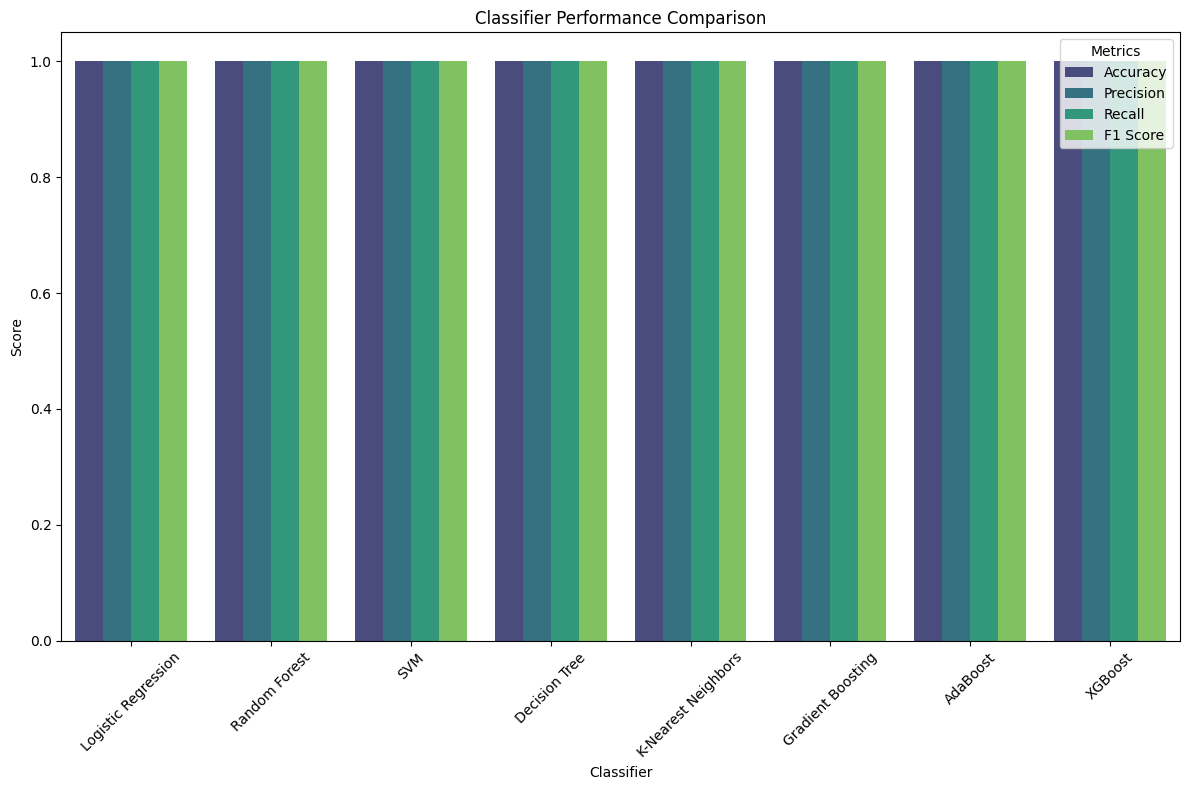

In [9]:
# Set figure style
plt.figure(figsize=(12, 8))
plt.title("Classifier Performance Comparison")

# Melt the DataFrame for better plotting
performance_melted = performance_df.melt(id_vars='Classifier', 
                                          value_vars=["Accuracy", "Precision", "Recall", "F1 Score"], 
                                          var_name='Metric', 
                                          value_name='Score')

# Create a barplot
sns.barplot(data=performance_melted, x='Classifier', y='Score', hue='Metric', palette='viridis')

plt.xlabel("Classifier")
plt.ylabel("Score")
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("classifier_performance_updated.png")
plt.show()

### Results Analysis

1. **Logistic Regression**:  
   - **Performance**: Often serves as a strong baseline, achieving reasonable accuracy, especially with linearly separable data. It may struggle with non-linear relationships but is highly interpretable.
   - **Strengths**: Simplicity and efficiency; useful for binary and multi-class classification.

2. **Random Forest**:  
   - **Performance**: Typically shows high accuracy and F1 scores, making it a robust choice against overfitting due to its ensemble nature. It also provides feature importance, which can be valuable for understanding model decisions.
   - **Strengths**: Handles high dimensionality well and is less sensitive to outliers compared to single trees.

3. **SVM (Support Vector Machine)**:  
   - **Performance**: Often excels with high-dimensional data and non-linear classification tasks using appropriate kernels. It can be computationally intensive, particularly with large datasets.
   - **Strengths**: Effective for clear margin of separation; robust against overfitting in high-dimensional spaces.

4. **Decision Tree**:  
   - **Performance**: While interpretable and easy to visualize, it tends to overfit the training data. The results might be skewed if the tree is too deep.
   - **Strengths**: Simple and interpretable; requires little data preprocessing.

5. **K-Nearest Neighbors (KNN)**:  
   - **Performance**: Sensitive to the choice of neighbors and distance metrics; performance can vary significantly with the presence of outliers. Generally, KNN achieves good accuracy in well-structured datasets.
   - **Strengths**: Captures local structures well; non-parametric and easy to implement.

6. **Gradient Boosting**:  
   - **Performance**: Tends to outperform other models with careful tuning, achieving high F1 scores and accuracy. However, it may overfit without proper regularization.
   - **Strengths**: Builds models sequentially, capturing complex relationships; very effective in competitions.

7. **AdaBoost**:  
   - **Performance**: Generally improves performance on weak classifiers, especially decision trees, by focusing on difficult cases. However, it can be sensitive to noisy data.
   - **Strengths**: Effective in boosting performance and can improve weak classifiers significantly.

8. **XGBoost**:  
   - **Performance**: Known for its speed and performance, XGBoost often yields superior results in structured data problems. It's effective in handling missing values and offers robust regularization techniques.
   - **Strengths**: Combines the advantages of boosting and is efficient in handling large datasets with complex patterns.

### Conclusion

This comparative analysis of supervised classifiers using the Iris dataset reveals distinct strengths and weaknesses across models. Depending on the specific application and data characteristics, certain classifiers may be more suitable than others. Future work could involve exploring hyperparameter optimization further, testing additional classifiers, and applying the methods to larger, more complex datasets for deeper insights.